Task
Data Loading and Cleaning:

Load the dataset using Pandas.
Perform basic data cleaning (handling missing values, incorrect data types, etc.).
Exploratory Data Analysis (EDA):

Use Pandas to summarize the key statistics of the dataset.
Identify unique values, ranges, and distribution of data.
Visualization Tasks:

Species Distribution: Use a bar chart to show the distribution of penguin species.
Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
Island Distribution: Visualize the count of penguins on each island using a pie chart.
Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.
Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).
Insightful Visualizations:

Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.
Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.


In [21]:
import pandas as pd
df = pd.read_csv('/content/Palmer Penguins Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [22]:
df = df.dropna()
df.duplicated().sum()

0

In [19]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [52]:
# df.set_index(['island', 'species'], inplace = True)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


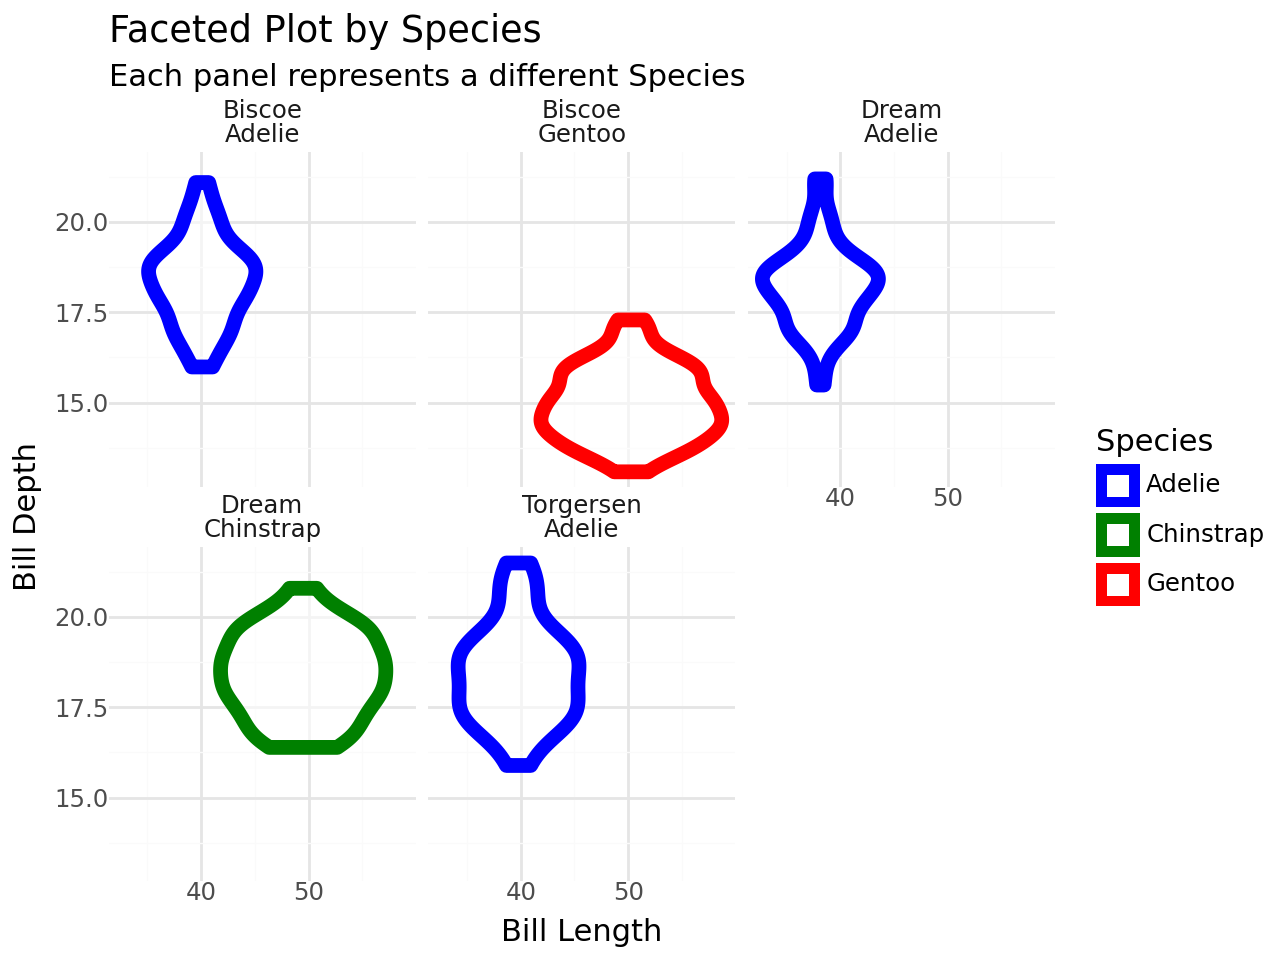

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
plot = (ggplot(df, aes(x='bill_length_mm', y='bill_depth_mm', color='species')) +
        geom_violin(size=3, alpha=0.6) +
        facet_wrap('~island + species') +
        theme_minimal() +
        labs(title="Faceted Plot by Species",
             subtitle="Each panel represents a different Species",
             x="Bill Length",
             y="Bill Depth",
             color="Species") +
        scale_color_manual(values=["blue", "green", "red", "yellow"]))
plot

Seems like there's no outliners, Drem-Adelie seems close to be one but not enough imo, especially considering low amount of rows we have.

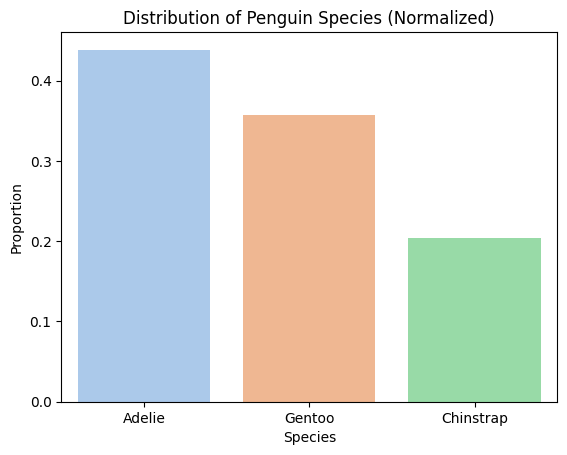

In [72]:
df_count_norm = df['species'].value_counts(normalize=True).reset_index()
df_count_norm.columns = ['species', 'proportion']
sns.barplot(data=df_count_norm, x='species', y='proportion',hue='species', palette='pastel')
plt.title('Distribution of Penguin Species (Normalized)')
plt.ylabel('Proportion')
plt.xlabel('Species')
plt.show()

Overall Adelie is almost half of the data we have, while Chinstrap are around of 1/5th of the data

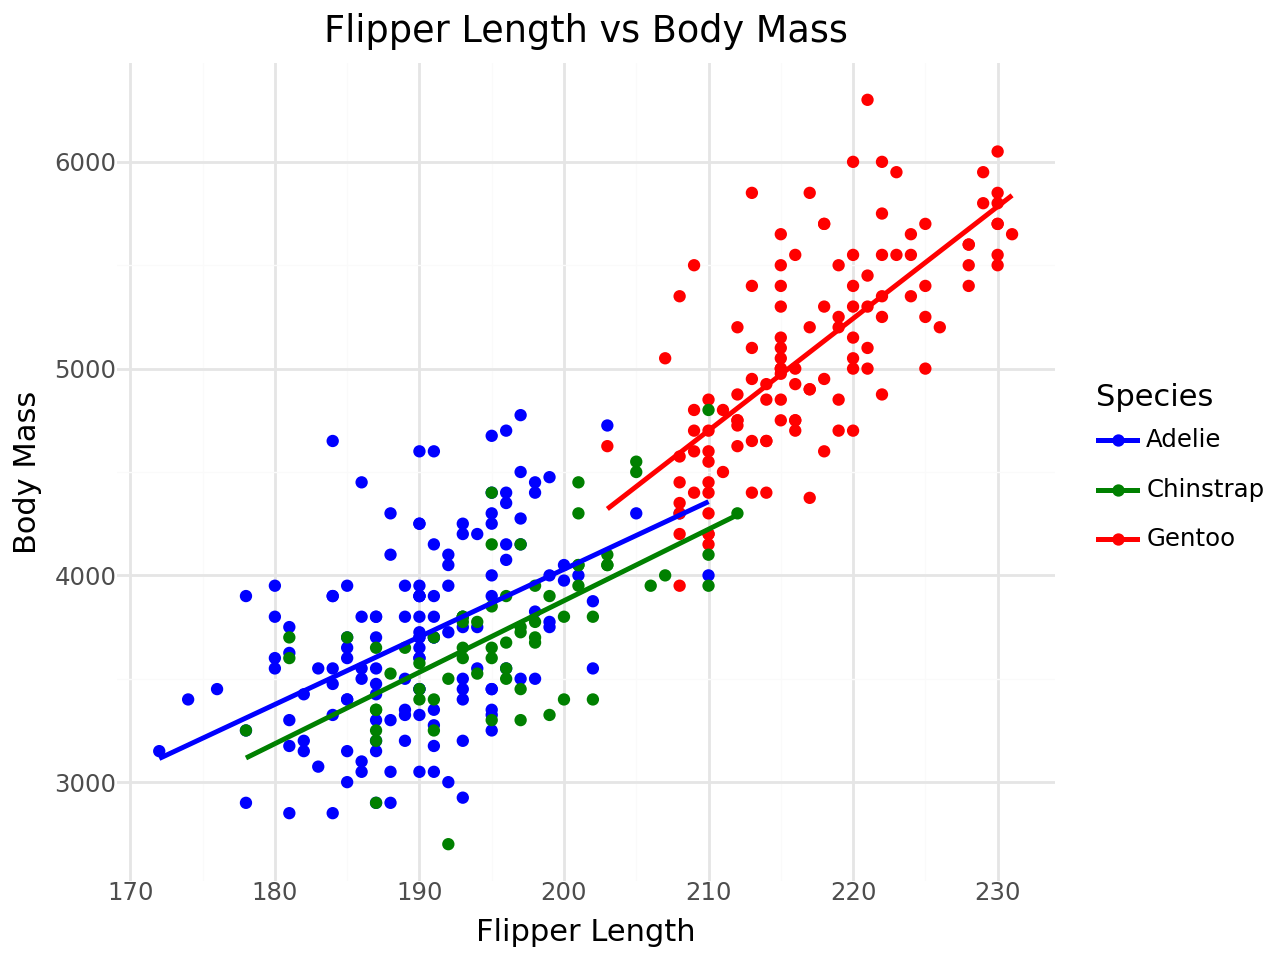

In [83]:
# sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', palette='viridis')
# sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter=False, lowess=True, color='black')
# plt.title('Flipper Length vs Body Mass')
# plt.show()
plot = (ggplot(df, aes(x='flipper_length_mm', y='body_mass_g', color='species')) +
        geom_point() +
        geom_smooth(method='lm', se=False) +
        theme_minimal() +
        labs(title="Flipper Length vs Body Mass",
             x="Flipper Length",
             y="Body Mass",
             color="Species") +
        scale_color_manual(values=["blue", "green", "red", "yellow"]))
plot

As we can see Flipper Length has positive correllation with Body Mass and Gentoo specie has the highest ratio

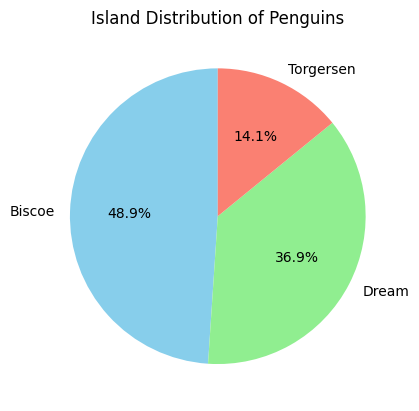

In [86]:
df['island'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('')
plt.title('Island Distribution of Penguins')
plt.show()

Biscoe is the most populated island containing almost half of all pengiuns from the dataset, Torgersen is the least populated

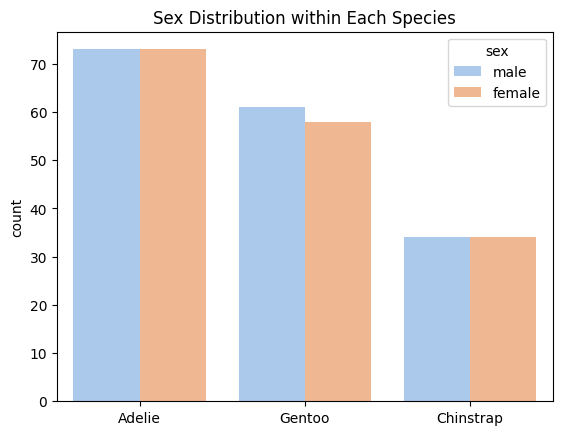

In [89]:
sns.countplot(data=df, x='species', hue='sex', palette='pastel')
plt.title('Sex Distribution within Each Species')
plt.xlabel('')
plt.show()

Male to Female ratio is nearly 1 to 1

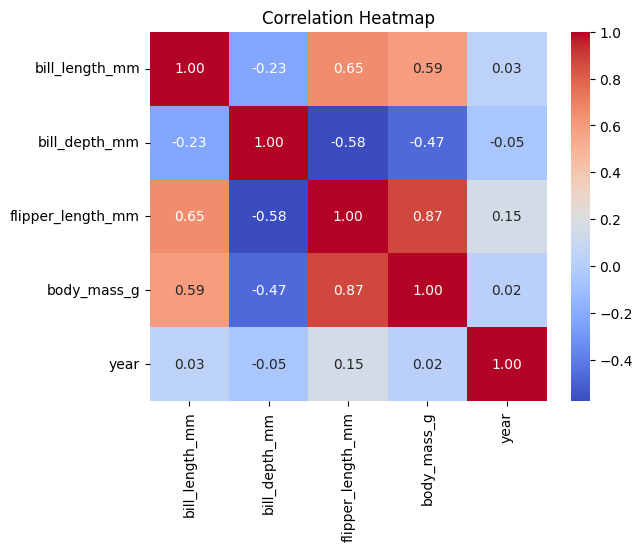

In [91]:
import numpy as np

corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

flippers length correlates higly positively with body mass and bill length, while negatively correlates with bill depth.

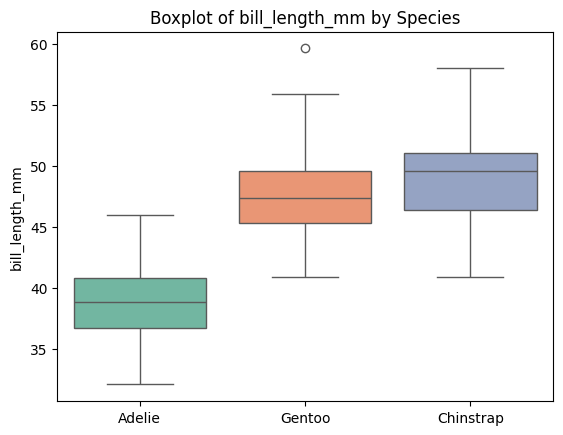

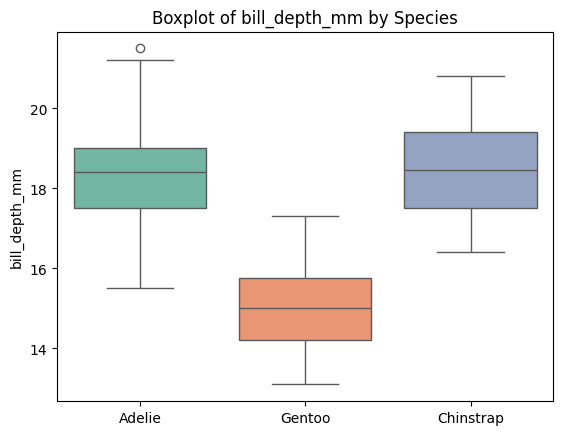

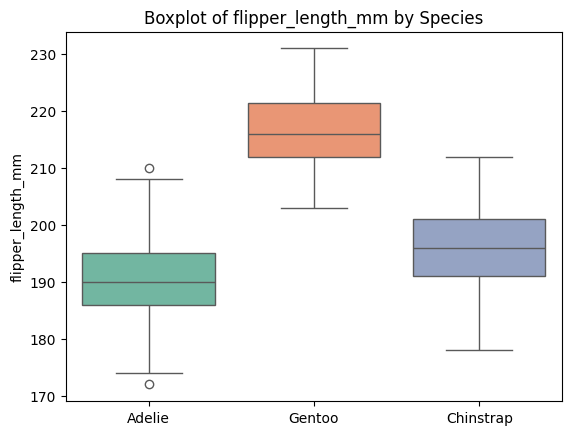

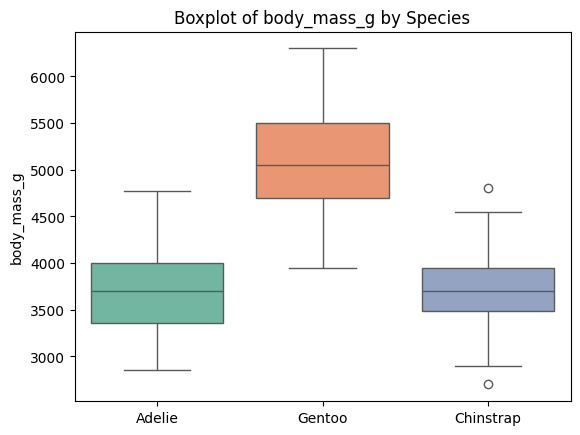

In [97]:
for meas in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.boxplot(data=df, x='species', y=meas, palette='Set2', hue = 'species')
    plt.title(f'Boxplot of {meas} by Species')
    plt.xlabel('')
    plt.show()

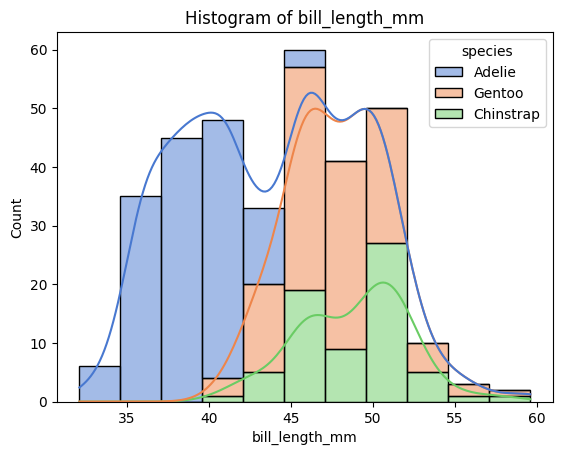

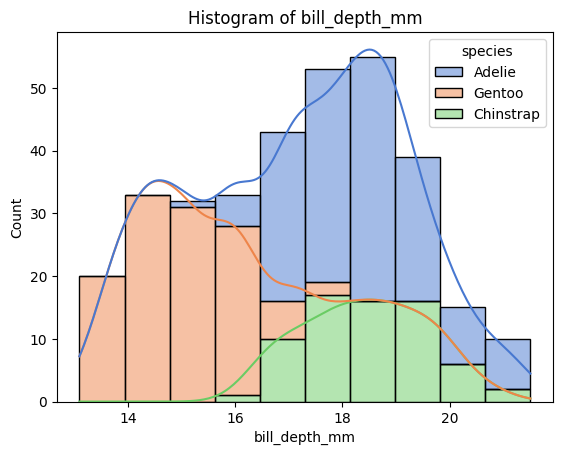

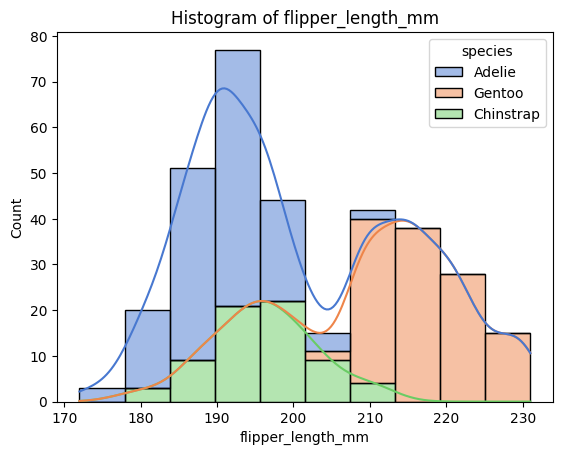

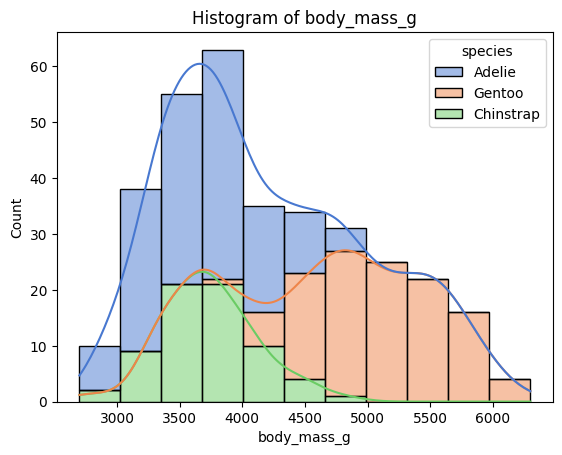

In [98]:
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.histplot(data=df, x=col, hue='species', multiple='stack', kde=True, palette='muted')
    plt.title(f'Histogram of {col}')
    plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

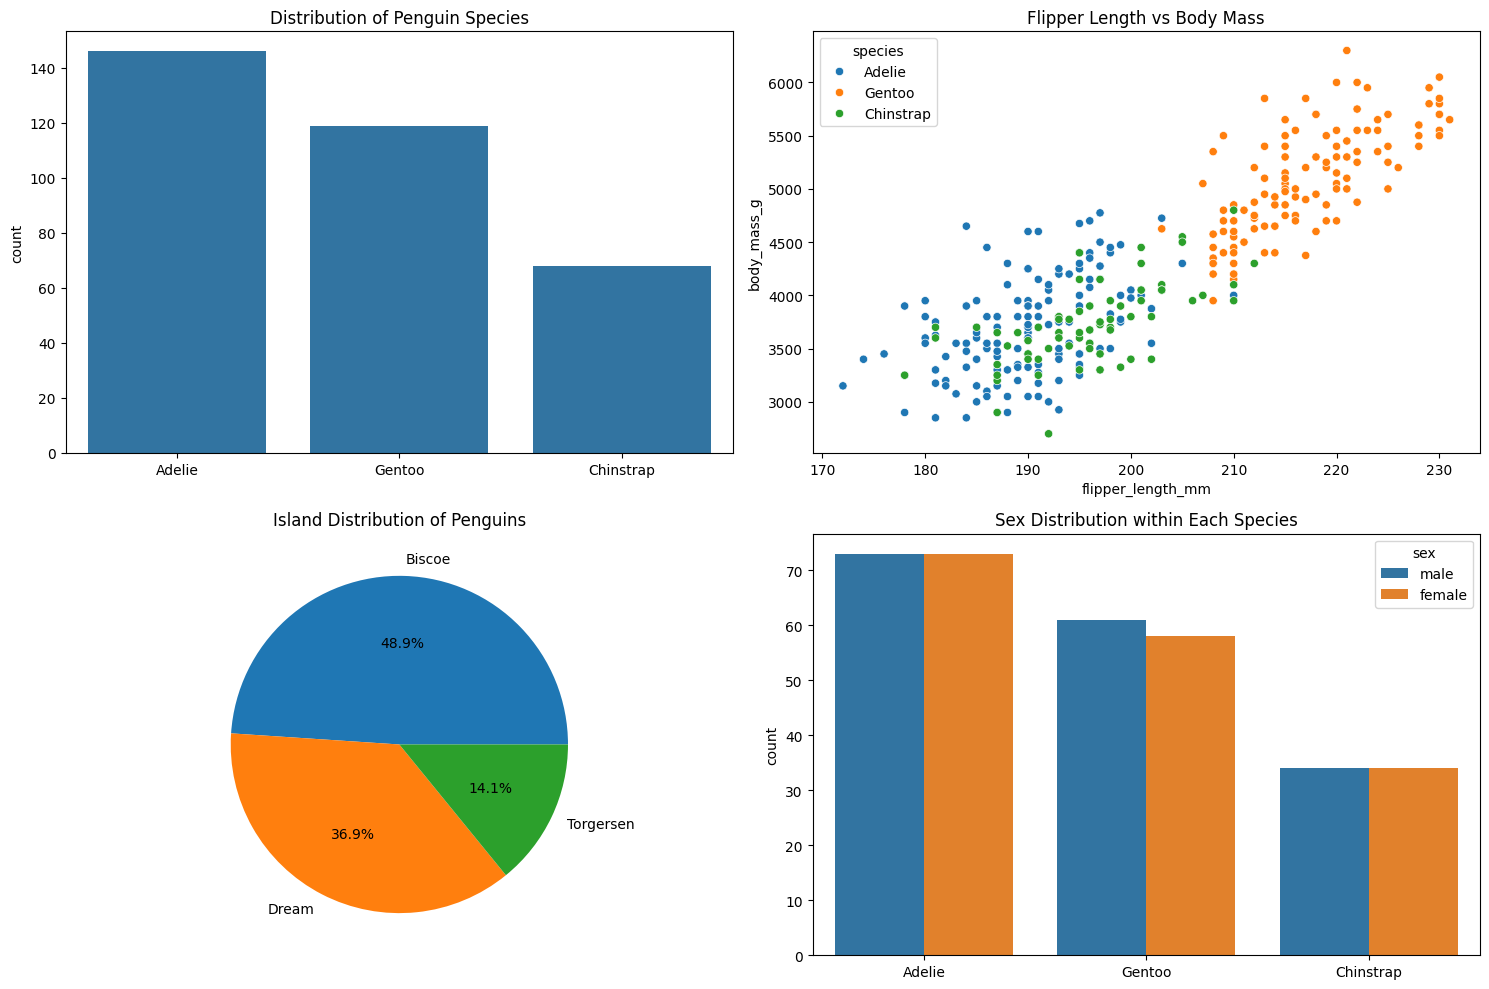

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.countplot(data=df, x='species', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Penguin Species')
axes[0, 0].set_xlabel('')

sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length vs Body Mass')

df['island'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title('Island Distribution of Penguins')
axes[1, 0].set_ylabel('')

sns.countplot(data=df, x='species', hue='sex', ax=axes[1, 1])
axes[1, 1].set_title('Sex Distribution within Each Species')
axes[1, 1].set_xlabel('')


plt.tight_layout()
plt


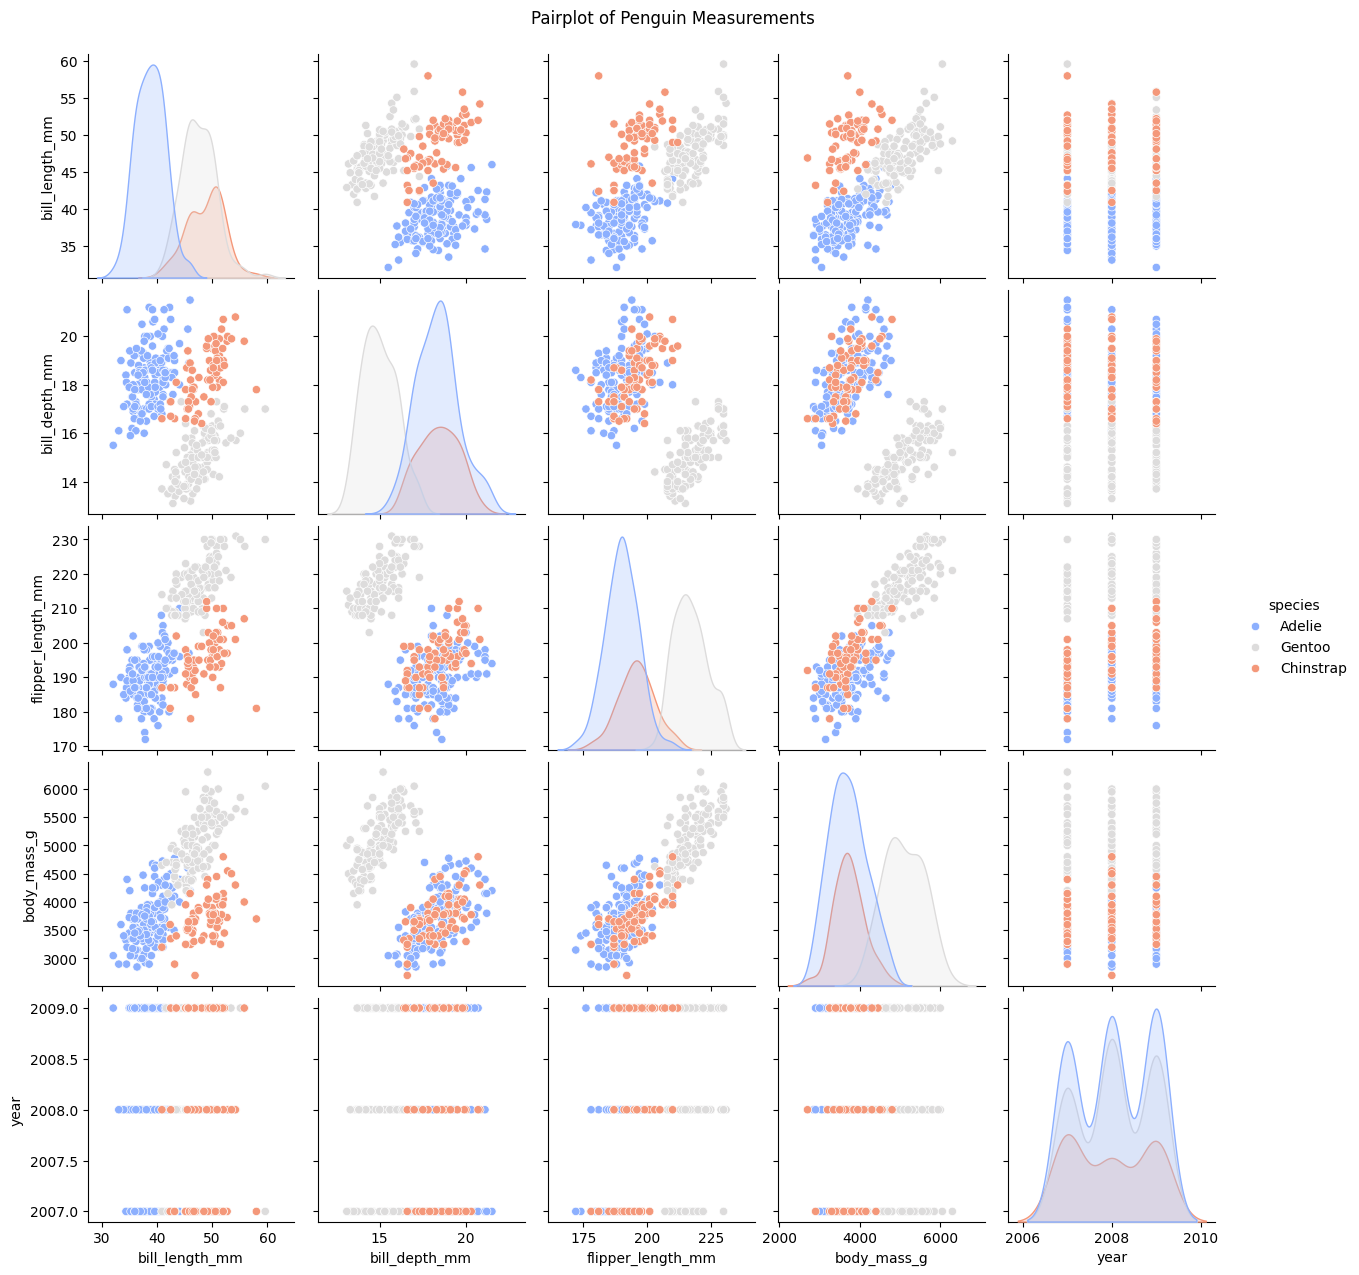

In [106]:
sns.pairplot(df, hue='species', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Penguin Measurements', y=1.02)
plt.show()

From all the data that we have we can tell that:
1. Adelie most prevalent group
2. Gentoo specie are biggest in terms of size, while Chinstrap and Adelie mostly the same
3. Most populated Island is - Biscoe, Least - Torgersen
4. Sex distribution if mostly equal without outstanding differences
5. Highest positive correlations are between flipper length and body mass, highets negative - flipper length and bill depth